Project to-do list

- Make all visualizations pretty and labeled
- Deeper dives into subgroups of data: protective factors for at-risk countries, introduce gender sub groups, introduce updated data to show potential for better measures (i.e. new ineq index)
- Answer question 3 as far as possible
- Write conclusion sections
- Do experimental tests at the end with caveat that it is exploratory and further research would be required (and could be done in the full fledged data science bootcamp)

Big picture to-dos

- Answer questions and clarify what uncertainty still remains
- Make code efficient and commented properly
- Make it look pretty
- Tell an engaging story
- Use the biggest variety of statistical and visual techniques that are appropriate


In [1]:
#importing necessary modules for statistical analysis and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('ggplot')

#matplotlib inline

C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Violence And Health In Human Populations: An Analytical Exploration

_The Capstone Data Analysis for Thinkful's Data Science Prep Course_

July 18, 2017

By Danny Mulligan

## Introduction ##

As it stands today, humans have divided the world into 195 nation-states, each deliniated from the other by geographical borders, histories of their peoples, governmental organization, and cultural moores. Although every human walking the earth today shares the same evolutionary history and thus, shares ~99.9% of their genes with any randomly selected stranger, a quick comparison of human behavior from one country to the next reveals staggering differences. To those of us interested in the alleviation of unneccessary human suffering, one of the most troubling differences is spelled out in blood: the differences in how frequently people kill each other and themselves.

Before writing this report, I started by surveying all the freely available data and came across the vast array of data sets published by the United Nations. Out of all the variables they measured while sampling the nations of the world, two immediately stood out to me: homicide rate and suicide rate. As a professional in the field of mental health and someone aspiring to earn a Ph.D. in Clinical Psychology, I immediately noticed the following questions pop up in my mind:

What are the most violent countries and what do they have in common? What causes one nation to be three times as violent as another? How can we use data science to identify likely causes of violence so that we can design preventative interventions and lower violence in countries across the globe?

Given the limited scope of this capstone report and my rudimentary knowledge of data science, I knew these questions were to vast and complex to answer. So I decided to amass a data set of violence and population health indicators and ask three more specific and modest questions that could be answered (at least in part).


# Analytic Questions

1. Do people living in more unequal countries kill each other more often?

2. Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?

3. Overall, which societal factors best account for elevated homicide rates? 

To answers these questions, I will conduct hypotheses tests. Each test will be a t-test to determine the difference in means between two samples and the probability that this difference is not due to chance. In each case, I start by assuming the same Null Hypothesis, namely that I cannot confidently assert there is a significant difference between the two samples. 

#### Alternative Hypotheses to Test

_Tests for Question 1_
- _H1:_ Countries where the top 20% highest earning households have a higher share of total income will have significantly higher homicide rates.

- _H2:_ Countries where the bottom 40% lowest earning households have a lower share of total income will have significantly higher homicide rates.

- _H3:_ Countries with a bigger gender gap in literacy rate will have significantly higher homicide rates. 

_Tests for Question 2_
- _H4:_ Countries with a higher proportion of children in inadequate care will have significantly higher homicide rates.

- _H5:_ Countries with a higher proportion of children in inadequate care will have significantly higher suicide rates.

- _H6:_ Countries with higher rates of violent child discipline will have significantly higher homicide rates.

- _H7:_ Countries with higher rates of violent child discipline will have significantly higher suicide rates.

Question 3 cannot be answered with a hypothesis test. In fact, I know that I cannot answer it definitively with my current data analysis tool set. Therefore, an exploratory analysis will lay the groundwork and I will propose ideas for further research.

In [2]:
df = pd.read_csv('Cleaned UN Deaths and Risks Data Set.csv')

# Part I: Describing the Data

The data set imported for this analysis is a conglomeration of multiple data sets published by two reputable international organizations: the United Nations and the World Health Organization (WHO). UNdata.com, created by the statistical branch of the Department of Economic and Social Affairs, provided most of the data. The Global Health Obseratory, run by WHO, collects thousands of indicators of global health and provided additional data for this analysis.

The data set consists of 16 population health indicators (columns) for 54 countries (rows). I chose this data set because of my urge to understand the complex and tragic phenomena of human violence. Thus, I started the data collection by finding two particularly important health indicators: homicide rate and suicide rate. The most complete and recent data available came from the WHO for the year 2015. The remaining 14 health indicators were selected by me based upon their hypothesized relevence to the variance in human violence from country to country.

Unfortunately, because the UN and WHO collect these data from a variety of sources across time, the 16 health indicators were not measured in the same year. Implications of this fact will be discussed later. For now, it will suffice to summarize the 16 health indicators. Every health indicator takes the form of a quantitative variable that varies continuously. In fact, every health indicator happens to be a percentage. I will now identify each health indicator by the variable name in the data set and provide a short description of its meaning.

__homicide rate__ - estimated homicides per 100,000 population members (2015)

__suicide rate__ - age-standardized suicides per 100,000 population members (2015)

__recent heavy drinking for male drinkers__ - percent of male heavy drinkers with at least one heavy drinking episode in the last 30 days (2010)

__recent heavy drinking for males__ - percent of males with at least one heavy drinking episode in the last 30 days (2010)

__urban pop__ - percent of population living in urban areas (2010)

__early ed attn__ - percent of children attending early childhood education (2005 - 2011)

__child discipline__ - percent of parents who report that they engage in violent child disciplinary practices (2005 - 2011)

__adult lit rate__ - percent of adults who are literate (2007 - 2011)

__edu spend__ - education expenditure as a percent of total central government expenditures (2007 - 2011)

__f to m lit ratio__ - ratio of adult female literacy rate to adult male literacy rate (2007 - 2011)

__health spend__ - health expenditure as a percent of total central government expenditures (2007 - 2011)

__children in bad care__ - percent of children left in inadequate care (2005 - 2011)

__poorest children in bad care__ - percent of the poorest 20% of children children left in inadequate care (2005 - 2011)

__pre 18 births__ - percent of females, age 20 to 24, who gave birth before age 18 (2007 - 2011)

__lowest 40 income share__ - the share of total income taken in by the poorest 40% of the population (2005 - 2011)

__highest 20 income share__ - the share of total income taken in by the richest 20% of the population (2005 - 2011)


In [3]:
df.describe()

,homicide_rate,suicide_rate,recent_heavy_drinking_for_male_drinkers,recent_heavy_drinking_for_males,urban_pop,early_ed_attn,child_discipline,adult_lit_rate,edu_spend,f_to_m_lit_ratio,health_spend,children_in_bad_care,poorest_children_in_bad_care,pre_18_births,lowest_40_income_share,highest_20_income_share
count,53.000000,54.000000,53.000000,53.000000,52.000000,54.000000,37.000000,47.000000,37.000000,47.000000,49.000000,39.000000,35.000000,42.000000,43.000000,43.000000
mean,8.754717,11.633333,17.900000,9.955849,43.736538,28.962963,77.567568,76.808511,4.594595,83.957447,3.265306,18.743590,22.914286,18.690476,17.930233,45.209302
std,7.735820,6.715176,16.913195,11.480635,17.495972,25.123816,14.072314,21.852906,1.657633,17.253805,1.729349,16.387926,17.790234,14.470303,3.232243,5.667611
min,1.300000,1.400000,0.400000,0.090000,9.100000,1.000000,38.000000,29.000000,1.000000,47.000000,0.000000,1.000000,2.000000,2.000000,10.000000,36.000000
25%,4.000000,7.125000,3.900000,0.500000,31.625000,8.500000,71.000000,57.500000,4.000000,66.500000,2.000000,7.500000,10.000000,4.500000,16.000000,41.500000
50%,6.900000,10.650000,13.700000,6.800000,41.050000,22.000000,82.000000,84.000000,5.000000,90.000000,3.000000,13.000000,17.000000,16.500000,18.000000,45.000000
75%,10.200000,14.875000,22.700000,13.200000,55.825000,39.750000,89.000000,97.500000,5.000000,99.000000,4.000000,29.000000,33.000000,27.500000,20.000000,47.500000
max,37.200000,30.600000,70.800000,47.800000,87.200000,98.000000,95.000000,100.000000,8.000000,112.000000,8.000000,61.000000,69.000000,55.000000,24.000000,61.000000


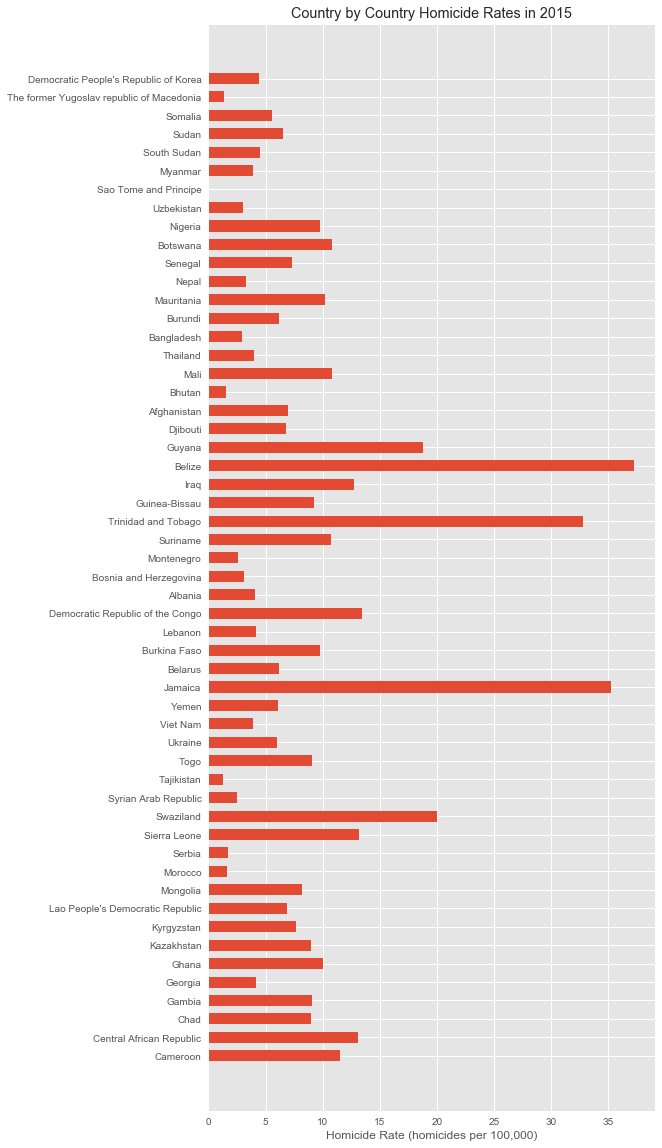

In [4]:
plt.figure(figsize=(8, 20))
plt.barh(np.arange(len(df.loc[:,'country'])), df.loc[:,'homicide_rate'], height=.6)
plt.yticks(np.arange(len(df.loc[:,'country'])), df.loc[:,'country'])
plt.xlabel('Homicide Rate (homicides per 100,000)')
plt.title('Country by Country Homicide Rates in 2015')
plt.show()

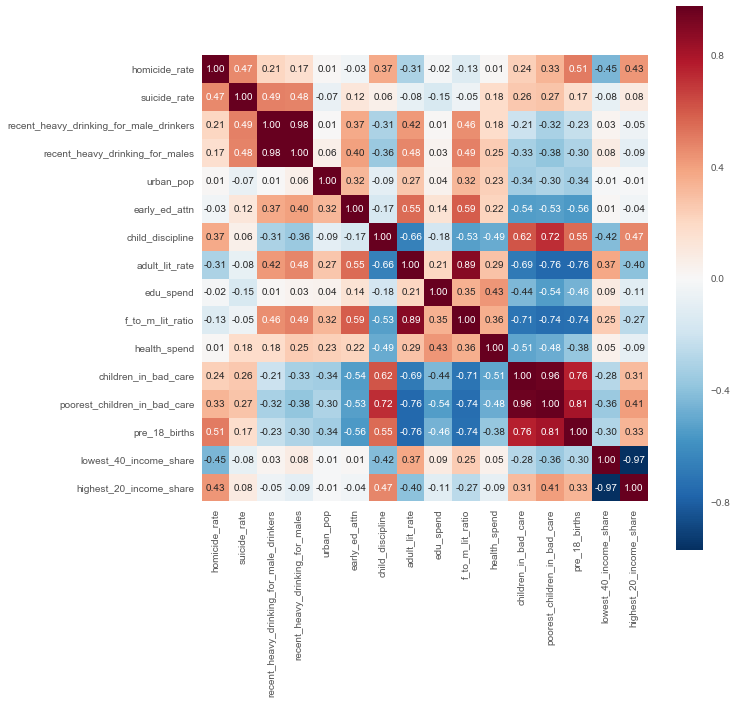

In [5]:
corrmat = df.corr(method='spearman')
plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

## 1. Do people living in more unequal countries kill each other more often?

__Part I: Checking Distributions__

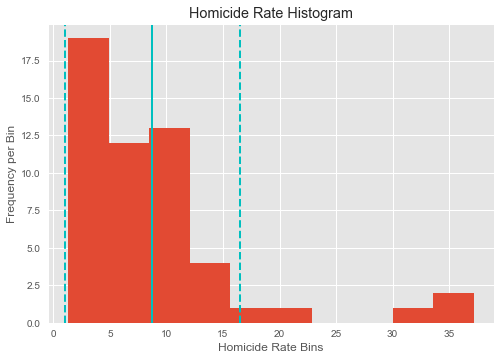

In [6]:
hom = df[df['homicide_rate'].isnull()==False]
plt.hist(hom['homicide_rate'])
plt.title("Homicide Rate Histogram")
plt.ylabel("Frequency per Bin")
plt.xlabel("Homicide Rate Bins")
plt.axvline(hom['homicide_rate'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(hom['homicide_rate'].mean() + hom['homicide_rate'].std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(hom['homicide_rate'].mean() - hom['homicide_rate'].std(), color='c', linestyle='dashed', linewidth=2)
plt.show()

C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


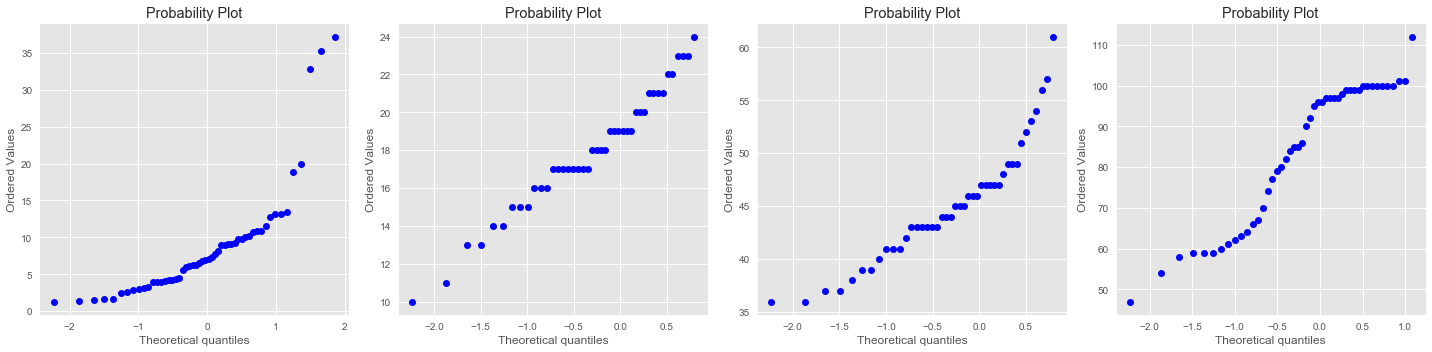

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
scipy.stats.probplot(df.loc[:,'homicide_rate'], plot=plt, fit=True)
plt.subplot(1, 4, 2)
scipy.stats.probplot(df.loc[:,'lowest_40_income_share'], plot=plt, fit=True)
plt.subplot(1, 4, 3)
scipy.stats.probplot(df.loc[:,'highest_20_income_share'], plot=plt, fit=True)
plt.subplot(1, 4, 4)
scipy.stats.probplot(df.loc[:,'f_to_m_lit_ratio'], plot=plt, fit=True)
plt.tight_layout()
plt.show()

In [8]:
print("The Normal Test Result for Homicide Rate is: ")
scipy.stats.mstats.normaltest(hom['homicide_rate'])

The Normal Test Result for Homicide Rate is: 


NormaltestResult(statistic=40.548866277160073, pvalue=1.5664825601840706e-09)

__Part II: Creating Sample Groups to Compare__

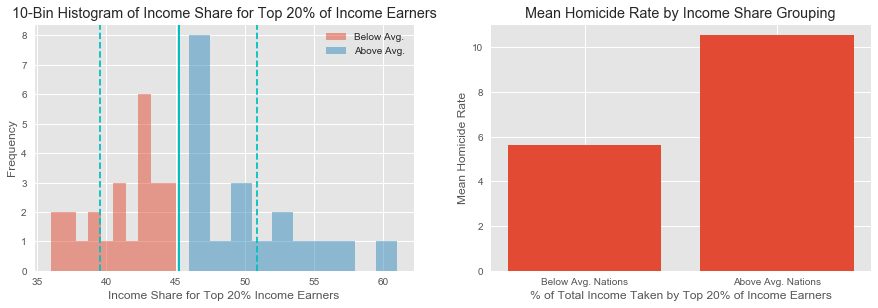

In [9]:
low_ineq = df[df['highest_20_income_share'] < df['highest_20_income_share'].mean()]
high_ineq = df[df['highest_20_income_share'] >= df['highest_20_income_share'].mean()]

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.hist(low_ineq['highest_20_income_share'], alpha=0.5, label='Below Avg.') 
plt.hist(high_ineq['highest_20_income_share'], alpha=0.5, label='Above Avg.') 
plt.legend(loc='upper right') 
plt.axvline(df['highest_20_income_share'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(df['highest_20_income_share'].mean() + df['highest_20_income_share'].std(), color='c', linestyle='dashed')
plt.axvline(df['highest_20_income_share'].mean() - df['highest_20_income_share'].std(), color='c', linestyle='dashed')
plt.title("10-Bin Histogram of Income Share for Top 20% of Income Earners")
plt.ylabel("Frequency")
plt.xlabel("Income Share for Top 20% Income Earners")

plt.subplot(2,2,2)
plt.bar([1,2], [low_ineq['homicide_rate'].mean(), high_ineq['homicide_rate'].mean()])
plt.title("Mean Homicide Rate by Income Share Grouping")
plt.ylabel("Mean Homicide Rate")
plt.xticks([1,2], ["Below Avg. Nations","Above Avg. Nations"])
plt.xlabel("% of Total Income Taken by Top 20% of Income Earners")
plt.show()

__Part III: Hypothesis Testing__

In [10]:
high_ineq2 = high_ineq[high_ineq['homicide_rate'].notnull()]
low_ineq2 = low_ineq[low_ineq['homicide_rate'].notnull()]
from scipy.stats import ttest_ind
print(scipy.stats.ttest_ind(high_ineq2['homicide_rate'], low_ineq['homicide_rate'], equal_var=False))

Ttest_indResult(statistic=2.5602117077951059, pvalue=0.018087384217050421)


In [11]:
def hypothesis_test(subgroup_var, q1, q2, indicator, p):
    lower = df[df[subgroup_var] < df[subgroup_var].quantile(q1)]
    higher = df[df[subgroup_var] > df[subgroup_var].quantile(q2)]
    lower2 = lower[lower[indicator].notnull()]
    higher2 = higher[higher[indicator].notnull()]
    print("Subgroup 1: n = {}, mean = {} for ".format(len(lower), lower[subgroup_var].mean()) + str(subgroup_var))
    print("Subgroup 2: n = {}, mean = {} for ".format(len(higher), higher[subgroup_var].mean()) + str(subgroup_var))
    print("\nHypothesis Test Results:")
    print("\nt-statistic = " + str(scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).statistic) 
        + ", p-value = " + str(scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).pvalue))
    if scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).pvalue < p:
        print("\nThe Null Hypothesis should be rejected!") 
        print("We can confidently assert that the subgroups are significantly different with respect to " + str(indicator))
    else:
        print("\nThe Null Hypothesis should NOT be rejected.")
        print("We cannot confidently assert that the subgroups are significantly different with respect to " + str(indicator))

In [12]:
hypothesis_test('lowest_40_income_share', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 20, mean = 15.2 for lowest_40_income_share
Subgroup 2: n = 19, mean = 20.789473684210527 for lowest_40_income_share

Hypothesis Test Results:

t-statistic = -2.25886970052, p-value = 0.0331197521255

The Null Hypothesis should be rejected!
We can confidently assert that the subgroups are significantly different with respect to homicide_rate


In [13]:
hypothesis_test('f_to_m_lit_ratio', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 23, mean = 68.73913043478261 for f_to_m_lit_ratio
Subgroup 2: n = 23, mean = 98.91304347826087 for f_to_m_lit_ratio

Hypothesis Test Results:

t-statistic = -0.0168817702427, p-value = 0.986645347482

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to homicide_rate


In [14]:
hypothesis_test('f_to_m_lit_ratio', .25, .75, 'homicide_rate',.05)

Subgroup 1: n = 12, mean = 59.333333333333336 for f_to_m_lit_ratio
Subgroup 2: n = 10, mean = 101.4 for f_to_m_lit_ratio

Hypothesis Test Results:

t-statistic = 0.304068767002, p-value = 0.7664813862

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to homicide_rate


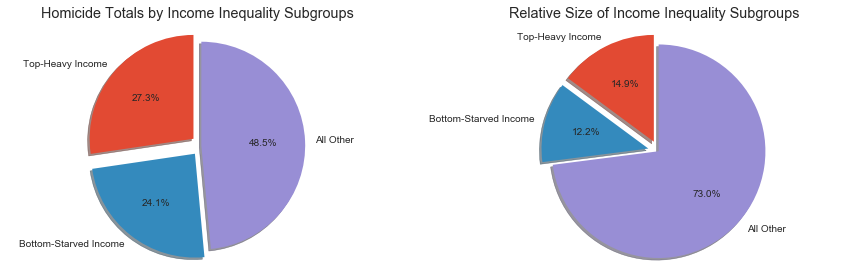

In [15]:
top_heavy = df[df['highest_20_income_share'] > df['highest_20_income_share'].quantile(.75)]
bottom_starved = df[df['lowest_40_income_share'] < df['lowest_40_income_share'].quantile(.25)]
labels = 'Top-Heavy Income', 'Bottom-Starved Income', 'All Other'
homicides = [top_heavy['homicide_rate'].sum(), bottom_starved['homicide_rate'].sum(), 
            df['homicide_rate'].sum() - top_heavy['homicide_rate'].sum() - bottom_starved['homicide_rate'].sum()]
explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title("Homicide Totals by Income Inequality Subgroups")
plt.pie(homicides, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') 
plt.subplot(2, 2, 2)
plt.title("Relative Size of Income Inequality Subgroups")
plt.pie([len(top_heavy['homicide_rate']),len(bottom_starved['homicide_rate']),len(df['homicide_rate'])], 
        explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 2. Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?

__Part I: Checking Distributions__

Before I conduct the hypothesis tests for this questions, I need to check if the samples come from a normal distribution. I will plot histograms to get a good visual and then use the SciPy normal test function (based on D’Agostino and Pearson’s omnibus test of normality) to verify my conclusion.

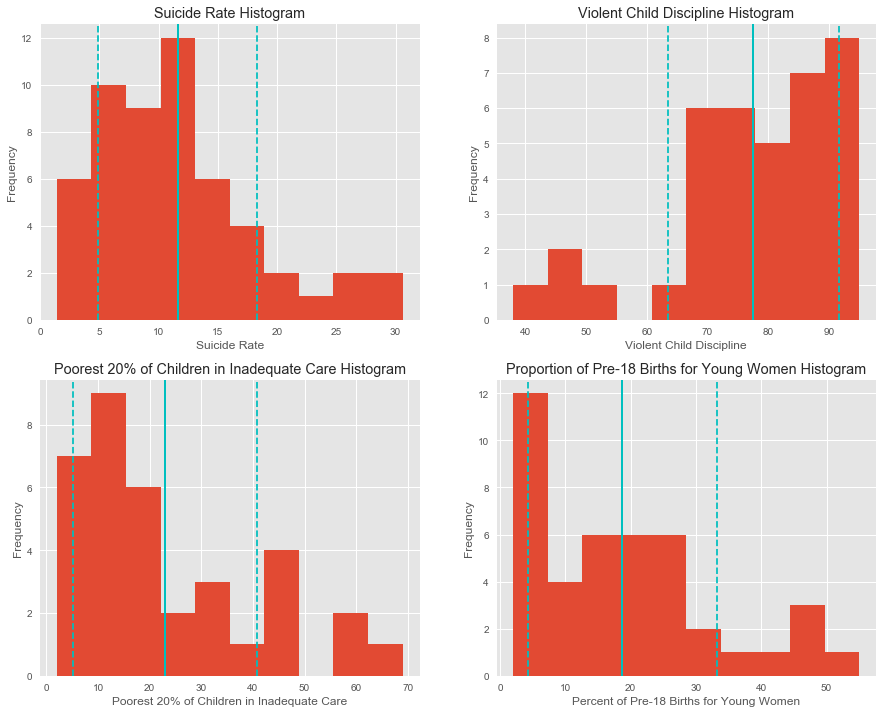

In [16]:
su_r = df[df['suicide_rate'].isnull()==False]
cd = df[df['child_discipline'].isnull()==False]
pc_bc = df[df['poorest_children_in_bad_care'].isnull()==False]
p18b = df[df['pre_18_births'].isnull()==False]

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.title("Suicide Rate Histogram")
plt.ylabel("Frequency")
plt.xlabel("Suicide Rate")
plt.hist(su_r['suicide_rate'])
plt.axvline(su_r['suicide_rate'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(su_r['suicide_rate'].mean() + su_r['suicide_rate'].std(), color='c', linestyle='dashed')
plt.axvline(su_r['suicide_rate'].mean() - su_r['suicide_rate'].std(), color='c', linestyle='dashed')
plt.subplot(2, 2, 2)
plt.title("Violent Child Discipline Histogram")
plt.ylabel("Frequency")
plt.xlabel("Violent Child Discipline")
plt.hist(cd['child_discipline'])
plt.axvline(cd['child_discipline'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(cd['child_discipline'].mean() + cd['child_discipline'].std(), color='c', linestyle='dashed')
plt.axvline(cd['child_discipline'].mean() - cd['child_discipline'].std(), color='c', linestyle='dashed')
plt.subplot(2, 2, 3)
plt.title("Poorest 20% of Children in Inadequate Care Histogram")
plt.ylabel("Frequency")
plt.xlabel("Poorest 20% of Children in Inadequate Care")
plt.hist(pc_bc['poorest_children_in_bad_care'])
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean() + pc_bc['poorest_children_in_bad_care'].std(), color='c', linestyle='dashed')
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean() - pc_bc['poorest_children_in_bad_care'].std(), color='c', linestyle='dashed')
plt.subplot(2, 2, 4)
plt.title("Proportion of Pre-18 Births for Young Women Histogram")
plt.ylabel("Frequency")
plt.xlabel("Percent of Pre-18 Births for Young Women")
plt.hist(p18b['pre_18_births'])
plt.axvline(p18b['pre_18_births'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(p18b['pre_18_births'].mean() + p18b['pre_18_births'].std(), color='c', linestyle='dashed')
plt.axvline(p18b['pre_18_births'].mean() - p18b['pre_18_births'].std(), color='c', linestyle='dashed')
plt.show()

Suicide rate appears to approximate a normal distribution, but the other three have significant outliers and frequency clusters that are far from the mean. It is unclear to me whether these three are sufficiently normal, so I will rely upon the aforementioned normal test given below:

In [17]:
print("Does 'suicide_rate' come from a normal distribution? pvalue = " 
      + str(scipy.stats.mstats.normaltest(su_r['suicide_rate']).pvalue))
print("Does 'child_discipline' come from a normal distribution? pvalue = " 
      + str(scipy.stats.mstats.normaltest(cd['child_discipline']).pvalue))
print("Does 'poorest_children_in_bad_care' come from a normal distribution? pvalue = "
      + str(scipy.stats.mstats.normaltest(pc_bc['poorest_children_in_bad_care']).pvalue))
print("Does 'pre_18_births' come from a normal distribution? pvalue = "
      + str(scipy.stats.mstats.normaltest(p18b['pre_18_births']).pvalue))

Does 'suicide_rate' come from a normal distribution? pvalue = 0.00642195076403
Does 'child_discipline' come from a normal distribution? pvalue = 0.0150629247458
Does 'poorest_children_in_bad_care' come from a normal distribution? pvalue = 0.0611457635611
Does 'pre_18_births' come from a normal distribution? pvalue = 0.159500494681


I'm choosing to operate with a 95% confidence interval (p < .05), so I cannot confidently move forward with the belief that 'poorest children in bad care' and 'pre 18 births' come from a normal distribution. Therefore, I will view the results of the t-tests skeptically and will not reject the Null Hypothesises.

__Part II: Hypothesis testing__

Using the previously defined hypothesis test function, I will now perform a series of t-tests on subgroups divided by the relevant health indicator variable. In the case that splitting by the .5 quantile does not produce a sufficiently small p-value, I will try the test again with a Q1 to Q3 comparision (i.e. comparing the countries below the 25th quantile to those above the 75th quantile). These samples will become smaller, which will make it more difficult to achieve a significant p-value. Implications of this will be discussed later.

In [18]:
hypothesis_test('child_discipline', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 18, mean = 66.33333333333333 for child_discipline
Subgroup 2: n = 16, mean = 89.375 for child_discipline

Hypothesis Test Results:

t-statistic = 0.712203840706, p-value = 0.481629605667

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to homicide_rate


In [19]:
hypothesis_test('child_discipline', .25, .75, 'homicide_rate', .05)

Subgroup 1: n = 9, mean = 58.111111111111114 for child_discipline
Subgroup 2: n = 8, mean = 92.5 for child_discipline

Hypothesis Test Results:

t-statistic = 2.58534208161, p-value = 0.022713184439

The Null Hypothesis should be rejected!
We can confidently assert that the subgroups are significantly different with respect to homicide_rate


Testing poorest children in bad care for homicide rate...

In [20]:
hypothesis_test('child_discipline', .5, .5, 'suicide_rate', .05)

Subgroup 1: n = 18, mean = 66.33333333333333 for child_discipline
Subgroup 2: n = 16, mean = 89.375 for child_discipline

Hypothesis Test Results:

t-statistic = 0.267658881254, p-value = 0.790687492039

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to suicide_rate


In [21]:
hypothesis_test('child_discipline', .25, .75, 'suicide_rate', .05)

Subgroup 1: n = 9, mean = 58.111111111111114 for child_discipline
Subgroup 2: n = 8, mean = 92.5 for child_discipline

Hypothesis Test Results:

t-statistic = -0.114084896409, p-value = 0.91102958485

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to suicide_rate


In [22]:
hypothesis_test('poorest_children_in_bad_care', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 16, mean = 8.5625 for poorest_children_in_bad_care
Subgroup 2: n = 17, mean = 37.11764705882353 for poorest_children_in_bad_care

Hypothesis Test Results:

t-statistic = 0.629148995743, p-value = 0.536368341705

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to homicide_rate


In [23]:
hypothesis_test('poorest_children_in_bad_care', .5, .5, 'suicide_rate', .05)

Subgroup 1: n = 16, mean = 8.5625 for poorest_children_in_bad_care
Subgroup 2: n = 17, mean = 37.11764705882353 for poorest_children_in_bad_care

Hypothesis Test Results:

t-statistic = 0.961133429806, p-value = 0.344878978961

The Null Hypothesis should NOT be rejected.
We cannot confidently assert that the subgroups are significantly different with respect to suicide_rate


## 3. Overall, which health indicators best account for elevated homicide rates? 

Ranking spearman correlation coeffecients...

In [24]:
corrmat['homicide_rate'].sort_values(ascending=False)

homicide_rate                              1.000000
pre_18_births                              0.507928
suicide_rate                               0.468941
highest_20_income_share                    0.425937
child_discipline                           0.369036
poorest_children_in_bad_care               0.327212
children_in_bad_care                       0.235255
recent_heavy_drinking_for_male_drinkers    0.209684
recent_heavy_drinking_for_males            0.165844
health_spend                               0.011941
urban_pop                                  0.011563
edu_spend                                 -0.021216
early_ed_attn                             -0.031499
f_to_m_lit_ratio                          -0.132251
adult_lit_rate                            -0.305304
lowest_40_income_share                    -0.447992
Name: homicide_rate, dtype: float64

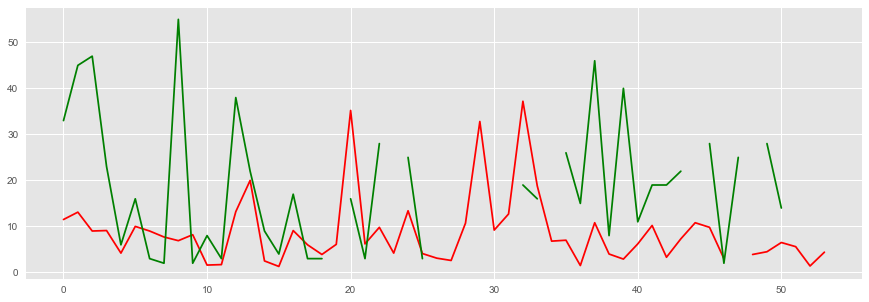

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df['homicide_rate'], color = 'r')
plt.plot(df['pre_18_births'], color = 'g')
plt.show()

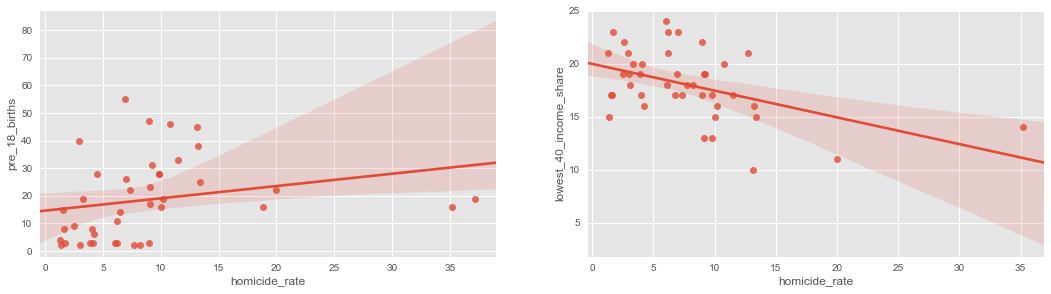

In [26]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.regplot(x = df['homicide_rate'], y = df['pre_18_births'])
plt.subplot(2,2,2)
sns.regplot(x = df['homicide_rate'], y = df['lowest_40_income_share'])
sns.plt.show()

In [27]:
result = smf.ols(formula="homicide_rate ~ poorest_children_in_bad_care + lowest_40_income_share", data=df).fit()

In [28]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          homicide_rate   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.13
Date:                Sat, 15 Jul 2017   Prob (F-statistic):           0.000277
Time:                        13:28:20   Log-Likelihood:                -81.217
No. Observations:                  31   AIC:                             168.4
Df Residuals:                      28   BIC:                             172.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Conclusion

1) Do people living in more unequal countries kill each other more often?

- __H1: Null Hypothesis Rejected!__ Countries where the top 20% highest earning households have a higher share of total income _do_ have significantly higher homicide rates.

- __H2: Null Hypothesis Rejected!__ Countries where the bottom 40% lowest earning households have a lower share of total income _do_ have significantly higher homicide rates.

- _H3: Null Hypothesis maintained!_ Countries with a bigger gender gap in literacy rate will have significantly higher homicide rates. 

2) Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?

- __H4: Null Hypothesis Rejected!__ Countries with a higher proportion of children in inadequate care _do_ have significantly higher homicide rates.

- _H5: Null Hypothesis Maintained!_ Countries with a higher proportion of children in inadequate care will have significantly higher suicide rates.

- _H6: Null Hypothesis Maintained!_ Countries with higher rates of violent child discipline will have significantly higher homicide rates.

- _H7: Null Hypothesis Maintained!_ Countries with higher rates of violent child discipline will have significantly higher suicide rates.

3)  Overall, which societal factors best account for elevated homicide rates? 


## Proposal for Further Research